In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
hist = yf.Ticker('infy.ns')
df = hist.history(period="7y",auto_adjust="True")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-20,419.908245,423.849849,414.037749,419.845337,4377180,0.0,0.0
2015-07-21,433.997438,481.800055,433.997438,466.557739,38310112,0.0,0.0
2015-07-22,463.349922,466.285171,451.462177,462.574188,12665660,0.0,0.0
2015-07-23,462.909613,468.381776,457.060103,460.414673,7710748,0.0,0.0
2015-07-24,459.387345,463.957905,454.166766,456.053711,4480302,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-13,1450.000000,1460.000000,1438.599976,1444.449951,5264025,0.0,0.0
2022-07-14,1451.000000,1452.949951,1414.000000,1428.849976,6157606,0.0,0.0
2022-07-15,1446.000000,1446.000000,1410.650024,1430.349976,5620018,0.0,0.0


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

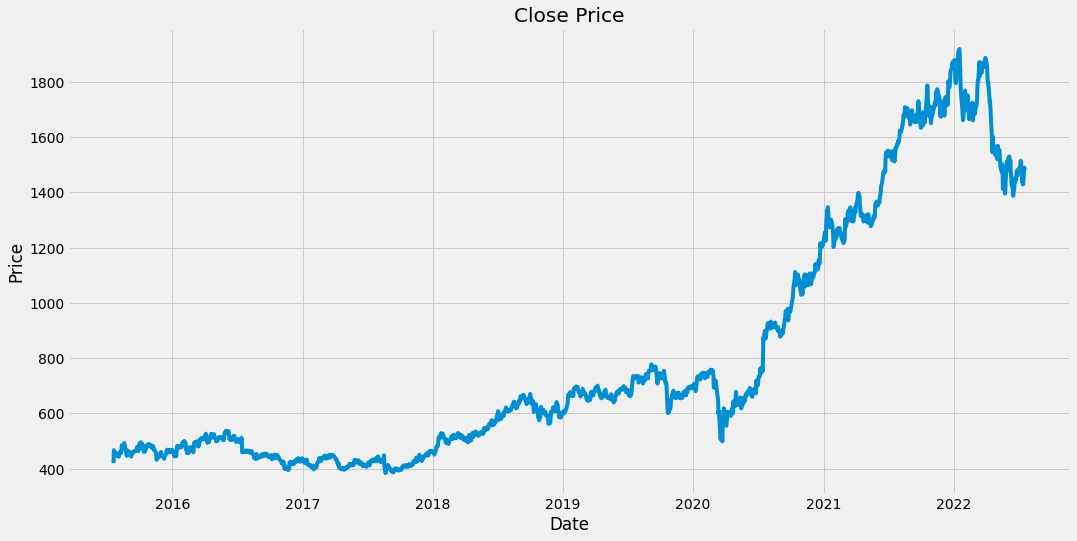

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price')
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1384

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02353404],
       [0.05395635],
       [0.05136199],
       ...,
       [0.68164371],
       [0.72042677],
       [0.71560737]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.02353404, 0.05395635, 0.05136199, 0.04995557, 0.04711541,
       0.04102557, 0.04035642, 0.04651467, 0.04230901, 0.04423433,
       0.04475323, 0.03882712, 0.0467741 , 0.04693789, 0.04930011,
       0.04667844, 0.05300058, 0.06262696, 0.066341  , 0.06395146,
       0.06201254, 0.06807513, 0.07113373, 0.0599371 , 0.06412894,
       0.0483307 , 0.04658294, 0.04083431, 0.04580463, 0.05351938,
       0.04897246, 0.04749773, 0.05035152, 0.05032419, 0.04338775,
       0.03923677, 0.03925042, 0.04741576, 0.04516286, 0.04797569,
       0.05043349, 0.05028327, 0.05095235, 0.051717  , 0.05177162,
       0.05253629, 0.05493946, 0.06157564, 0.05201743, 0.05646873,
       0.06741971, 0.07045106, 0.07282696, 0.0654125 , 0.05956833,
       0.05928164, 0.06890812, 0.05675551, 0.05033789, 0.04984633])]
[0.049778023593411574]

[array([0.02353404, 0.05395635, 0.05136199, 0.04995557, 0.04711541,
       0.04102557, 0.04035642, 0.04651467, 0.04230901, 0.04423433,
       0.04475323, 0.03882712, 0.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1324, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1324/1324 [==============================] - 37s 26ms/step - loss: 9.2585e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.640479577105978

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


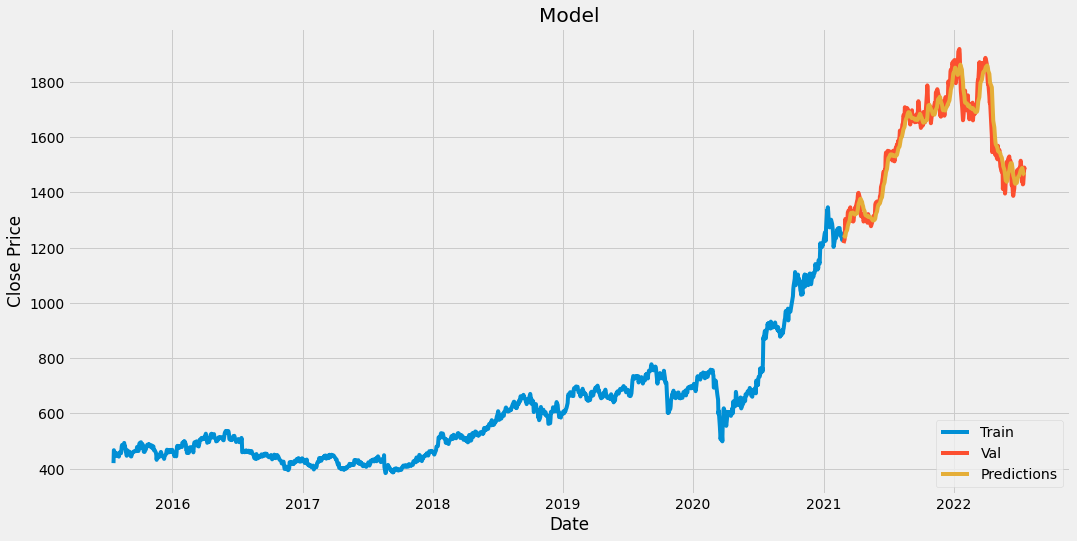

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
#Plot & Visualize the data.
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
upvalid

,Close,Predictions
Date,,
2021-02-26,1216.148438,1246.504150
2021-03-01,1229.442261,1242.399658
2021-03-02,1265.830688,1239.322388
2021-03-03,1303.723145,1240.617432
2021-03-04,1290.914429,1247.811035
...,...,...
2022-07-13,1444.449951,1484.758057
2022-07-14,1428.849976,1479.153076
2022-07-15,1430.349976,1471.353149
